In [58]:
!pip uninstall imbalanced-learn -y

!pip install plotly 
!pip install chart-studio 
!pip install -U scikit-learn 

!pip install pandas
!pip install numpy
!pip install imblearn
!pip install scikit-learn
!pip install xgboost
!pip install imbalanced-learn

Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (1.0.2)
  Using cached https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl


In [59]:
import pandas as pd
import numpy as np
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import types
import pandas as pd

def __iter__(self): return 0

In [60]:
# 1: Data Preprocessing
# Load the historical dataset
pd_data = pd.read_csv('data/historical.txt',delimiter=' ', header=None)
pd_data = pd_data.dropna(axis='columns', how='all')

# Count the number of different machine
unit_count = pd.DataFrame(pd_data.groupby([0]).agg(['count']))
unit_count.shape

# Count the number of different cycle
cycle_count = pd.DataFrame(pd_data.groupby([1]).agg(['count']))
cycle_count.shape

(362, 25)

In [61]:
pd.options.mode.chained_assignment = None
# Add a column to register the equipment failure
pd_data['failure'] = 0

i = 1
for unit in pd_data[0] :
    try:
        if unit != pd_data[0][i] :
            pd_data['failure'][i-1] = 1
    except KeyError:
        pd_data['failure'][i-1] = 1
    i+=1

pd_data.to_csv('pd_data.csv', index=False)

In [62]:
# Correlation of the independent variable with the dependent variable
data_corr=pd_data.corr(method='pearson')

data_corr=data_corr[['failure']]
data_corr['abs_failure']=abs(data_corr['failure'])
data_corr=data_corr.sort_values(by=['abs_failure'], ascending=[False])
# print(data_corr)

In [63]:
pd_data['flipper'] = np.where((pd_data[0] != pd_data[0].shift(1)), 1, 0)
pd_data.head()

feature_window=20

pd_data.to_csv('pd_data.csv', index=False)

In [64]:
dfx=pd_data

starter=dfx[dfx['flipper'] == 1]

starter=starter[[1,0]]

#rename date to start_date
starter=starter.rename(index=str, columns={1: "start_date"})

In [65]:
dfx['too_soon'] = np.where((dfx[1] < feature_window) , 1, 0)

dfx.to_csv('dfx.csv', index=False)

In [66]:
i=0

for i in range(2,25) :
    dfx['S'+str(i)+'_mean'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).mean()) , dfx[i])
    dfx['S'+str(i)+'_median'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).median()) , dfx[i])
    dfx['S'+str(i)+'_max'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).max()) , dfx[i])
    dfx['S'+str(i)+'_min'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).min()) , dfx[i])
    dfx['S'+str(i)+'_chg'] = np.where((dfx['S'+str(i)+'_mean'] == 0),0 , dfx[i]/dfx['S'+str(i)+'_mean'])

dfx.to_csv('dfx.csv', index=False)
dfx.head()

/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_43080/655906664.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx['S'+str(i)+'_mean'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).mean()) , dfx[i])
/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_43080/655906664.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfx['S'+str(i)+'_median'] = np.where((dfx.too_soon == 0),(dfx[i].rolling(min_periods=1, window=feature_window).median()) , dfx[i])
/var/folders/n2/p2xrzw

,0,1,2,3,4,5,6,7,8,9,...,S23_mean,S23_median,S23_max,S23_min,S23_chg,S24_mean,S24_median,S24_max,S24_min,S24_chg
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,100.0,100.0,100.0,100.0,1.0,39.06,39.06,39.06,39.06,1.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,100.0,100.0,100.0,100.0,1.0,39.00,39.00,39.00,39.00,1.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,100.0,100.0,100.0,100.0,1.0,38.95,38.95,38.95,38.95,1.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,100.0,100.0,100.0,100.0,1.0,38.88,38.88,38.88,38.88,1.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,100.0,100.0,100.0,100.0,1.0,38.90,38.90,38.90,38.90,1.0


In [67]:
#copy the data set to the original name
pd_data=dfx

In [68]:
target_window=20

df_failure=pd_data[pd_data['failure'] == 1]

df_failure=df_failure[[1,0]]

df_failure=df_failure.rename(index=str, columns={1: 'failure_cycle'})

pd_data=pd_data.sort_values(by=[0], ascending=[True])
df_failure=df_failure.sort_values(by=[0], ascending=[True])

pd_data =pd_data.merge(df_failure, on=[0], how='left')

pd_data=pd_data.sort_values(by=[0,1], ascending=[True, True])

pd_data['cycle_to_failure'] = pd_data['failure_cycle'] - pd_data[1]

pd_data.head()

/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_43080/1193270509.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pd_data['cycle_to_failure'] = pd_data['failure_cycle'] - pd_data[1]


,0,1,2,3,4,5,6,7,8,9,...,S23_max,S23_min,S23_chg,S24_mean,S24_median,S24_max,S24_min,S24_chg,failure_cycle,cycle_to_failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,100.0,100.0,1.0,39.06,39.06,39.06,39.06,1.0,192,191
123,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,100.0,100.0,1.0,39.00,39.00,39.00,39.00,1.0,192,190
124,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,100.0,100.0,1.0,38.95,38.95,38.95,38.95,1.0,192,189
125,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,100.0,100.0,1.0,38.88,38.88,38.88,38.88,1.0,192,188
126,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,100.0,100.0,1.0,38.90,38.90,38.90,38.90,1.0,192,187


In [69]:
pd_data['failure_target'] = np.where(((pd_data.cycle_to_failure < target_window) & ((pd_data.cycle_to_failure>=0))), 1, 0)

pd_data.to_csv('pd_data.csv', index=False)
pd_data.head()

/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_43080/287310648.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pd_data['failure_target'] = np.where(((pd_data.cycle_to_failure < target_window) & ((pd_data.cycle_to_failure>=0))), 1, 0)


,0,1,2,3,4,5,6,7,8,9,...,S23_min,S23_chg,S24_mean,S24_median,S24_max,S24_min,S24_chg,failure_cycle,cycle_to_failure,failure_target
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,100.0,1.0,39.06,39.06,39.06,39.06,1.0,192,191,0
123,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,100.0,1.0,39.00,39.00,39.00,39.00,1.0,192,190,0
124,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,100.0,1.0,38.95,38.95,38.95,38.95,1.0,192,189,0
125,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,100.0,1.0,38.88,38.88,38.88,38.88,1.0,192,188,0
126,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,100.0,1.0,38.90,38.90,38.90,38.90,1.0,192,187,0


In [70]:
failure_summed = pd_data.groupby(['failure_target'])[2].count()
failure_summed

failure_target
0    18631
1     2000
Name: 2, dtype: int64

In [71]:
pd_data['failure_target'].mean()

0.0969414958072803

In [72]:
df_group=pd_data

pd_id=df_group.drop_duplicates(subset=0)
pd_id=pd_id[[0]]
pd_id.shape

np.random.seed(42)
pd_id['group'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000
pd_id=pd_id[[0, 'group']]
pd_id['MODELING_GROUP'] = np.where(((pd_id.group <= 0.80)), 'TRAINING', 'VALIDATION')

In [73]:
pd_data =pd_data.merge(pd_id, on=[0], how='inner')
pd_data.head()

,0,1,2,3,4,5,6,7,8,9,...,S24_mean,S24_median,S24_max,S24_min,S24_chg,failure_cycle,cycle_to_failure,failure_target,group,MODELING_GROUP
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,39.06,39.06,39.06,39.06,1.0,192,191,0,0.727,TRAINING
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,39.00,39.00,39.00,39.00,1.0,192,190,0,0.727,TRAINING
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,38.95,38.95,38.95,38.95,1.0,192,189,0,0.727,TRAINING
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,38.88,38.88,38.88,38.88,1.0,192,188,0,0.727,TRAINING
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,38.90,38.90,38.90,38.90,1.0,192,187,0,0.727,TRAINING


In [74]:
df_training=pd_data[pd_data['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','group','cycle_to_failure','flipper'])
df_training.shape

(16640, 145)

In [75]:
training_features=df_training.iloc[:,2:len(df_training.columns)-4]
training_target=df_training[['failure_target']]

training_features.columns = training_features.columns.astype(str)

In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])
x_res, y_res = smx.fit_resample(training_features, training_target.values.ravel())


In [77]:
df_x=pd.DataFrame(x_res)
df_x.head()

,2,3,4,5,6,7,8,9,10,11,...,S22_min,S22_chg,S23_mean,S23_median,S23_max,S23_min,S23_chg,S24_mean,S24_median,S24_max
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,39.06,39.06,39.06
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,39.00,39.00,39.00
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.95,38.95,38.95
3,0.0007,-0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.88,38.88,38.88
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.90,38.90,38.90


In [78]:
df_y=pd.DataFrame(y_res)
df_y.columns = ['failure_target']
df_y.mean(axis = 0)

failure_target    0.5
dtype: float64

In [79]:
df_balanced = pd.concat([df_y, df_x], axis=1)
df_balanced.head()

,failure_target,2,3,4,5,6,7,8,9,10,...,S22_min,S22_chg,S23_mean,S23_median,S23_max,S23_min,S23_chg,S24_mean,S24_median,S24_max
0,0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,39.06,39.06,39.06
1,0,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,39.00,39.00,39.00
2,0,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.95,38.95,38.95
3,0,0.0007,-0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.88,38.88,38.88
4,0,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.0,1.0,100.0,100.0,100.0,100.0,1.0,38.90,38.90,38.90


In [80]:
features = [x for x in df_balanced.columns if x not in ['failure_target']]  
dependent=pd.DataFrame(df_balanced['failure_target'])

independent=df_balanced.drop(columns=['failure_target'])

In [85]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):
    
   
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['failure_target'], eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['failure_target'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['failure_target'], dtrain_predprob))

In [86]:
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

In [87]:
xgb0 = XGBClassifier(objective = 'binary:logistic',use_label_encoder=False,learning_rate = lr_vals,
n_estimators=estimator_vals,max_depth=md_vals,min_child_weight=mcw_vals,
gamma=gamma_vals,subsample=subsample_vals,colsample_bytree=c_bt_vals,
reg_lambda=reg_lambda_vals,reg_alpha=reg_alpha_vals);

/Users/lvm/.conda/envs/pythonProject/lib/python3.8/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


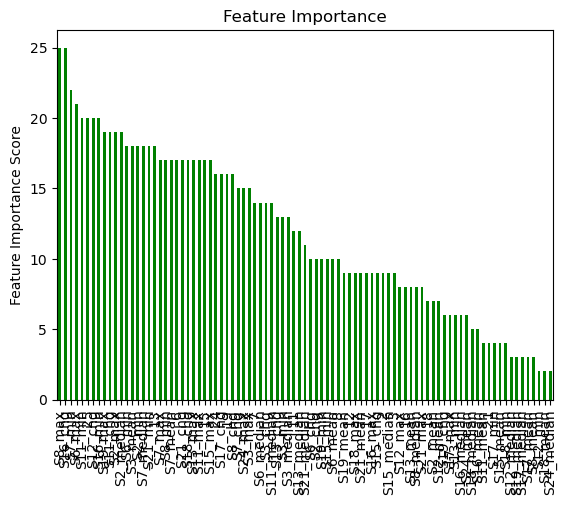

In [88]:
evaluate_model(xgb0, independent, dependent,features) 

In [53]:
df_train_test=pd_data[pd_data['MODELING_GROUP'] != 'VALIDATION']

df_train_test=df_train_test.drop(columns=['group','cycle_to_failure','flipper'])
df_train_test.shape

df_testing=df_train_test[df_train_test['MODELING_GROUP'] == 'VALIDATION'].copy()
df_training=df_train_test[df_train_test['MODELING_GROUP'] != 'VALIDATION'].copy()

In [55]:
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['failure_target'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['failure_target'], df_training['P_FAIL']))

NotFittedError: need to call fit or load_model beforehand

In [175]:

df_testing = pd.read_csv('data/snapshot.txt',delimiter=' ', header=None)
df_testing = df_testing.dropna(axis='columns', how='all')

pd.options.mode.chained_assignment = None
# Add a column to register the equipment failure
df_testing['failure'] = 0

i = 1
for unit in pd_data[0] :
    try:
        if unit != pd_data[0][i] :
            df_testing['failure'][i-1] = 1
    except KeyError:
        df_testing['failure'][i-1] = 1
    i+=1
    
df_testing['too_soon'] = np.where((df_testing[1] < feature_window) , 1, 0)
    
i=0    
for i in range(2,26) :
    df_testing['S'+str(i)+'_mean'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=feature_window).mean()) , df_testing[i])
    df_testing['S'+str(i)+'_median'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=feature_window).median()) , df_testing[i])
    df_testing['S'+str(i)+'_max'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=feature_window).max()) , df_testing[i])
    df_testing['S'+str(i)+'_min'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=feature_window).min()) , df_testing[i])
    df_testing['S'+str(i)+'_chg'] = np.where((df_testing['S'+str(i)+'_mean'] == 0),0 , df_testing[i]/df_testing['S'+str(i)+'_mean'])

df_failure=df_testing[df_testing['failure'] == 1]

df_failure=df_failure[[1,0]]

df_failure=df_failure.rename(index=str, columns={1: 'failure_cycle'})

df_testing=df_testing.sort_values(by=[0], ascending=[True])
df_failure=df_failure.sort_values(by=[0], ascending=[True])

df_testing =df_testing.merge(df_failure, on=[0], how='left')

df_testing=df_testing.sort_values(by=[0,1], ascending=[True, True])

# pd_data['failure_cycle'] = pd.to_datetime(pd_data['failure_cycle'])
# pd_data[0] = pd.to_datetime(pd_data['DATE'])
# pd_data['C'] = pd_data['FAILURE_DATE'] - pd_data['DATE']

df_testing['cycle_to_failure'] = df_testing['failure_cycle'] - pd_data[1]

df_testing['failure_target'] = np.where(((df_testing.cycle_to_failure < target_window) & ((df_testing.cycle_to_failure>=0))), 1, 0)

    
df_testing.columns = df_testing.columns.astype(str)
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['failure_target'].values, df_testing['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_testing['failure_target'], df_testing['P_FAIL']))

/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_41642/345013677.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_testing['S'+str(i)+'_median'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=feature_window).median()) , df_testing[i])
/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_41642/345013677.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_testing['S'+str(i)+'_max'] = np.where((df_testing.too_soon == 0),(df_testing[i].rolling(min_periods=1, window=featur

Accuracy : 0.9258
AUC Score (Train): 0.520810


/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_41642/345013677.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
/var/folders/n2/p2xrzwqs7y75f2mrw6p4m0m40000gn/T/ipykernel_41642/345013677.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)


In [176]:
df_testing.to_csv('df_testing.csv', index=False)

In [179]:
fail_prediction = df_testing.loc[:,['0','1','P_FAIL','Y_FAIL']]

In [181]:
fail_prediction.to_csv('fail_prediction.csv', index=False)

In [209]:
result_fail=fail_prediction.loc[fail_prediction['Y_FAIL']==1]
unit_fail = result_fail.groupby(['0']).groups.keys()
print("The units that would probably failed in the next 20 cycles are :" + str(list(unit_fail)))

The units that would probably failed in the next 20 cycles are :[20, 24, 31, 34, 35, 42, 49, 56, 64, 66, 68, 76, 81, 82, 91, 92, 100]
